## Implementation of ANN in Keras 
#### Classification Problem

Using mnist dataset from Keras 

In this project we would try to build an Artificial Neural Network that would predict the digits using the pixels of the images of the digits. The pixels of the images will be used as the input feature and the digits associated with the images will be used as the target feature. 

In [59]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os

In [60]:
data = tf.keras.datasets.mnist

In [61]:
data

<module 'keras.api._v2.keras.datasets.mnist' from '/opt/conda/lib/python3.10/site-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

Train-Test split

In [62]:
(x_train_full, y_train_full), (x_test, y_test) = data.load_data()

Making the first 5000 data(images) of the training set as the validation data and the rest is kept for trining the model. 

Each of the pixel value ranges from 0 to 255. So we can divide the input features of the training, validation, and test data by 255 in order to scale it down between 0 and 1.

In [63]:
x_valid, x_train = x_train_full[:5000] / 255 , x_train_full[5000:] / 255
y_valid, y_train = y_train_full[:5000] , y_train_full[5000:]

x_test = x_test / 255

In [64]:
print(len(x_train))
print(len(x_valid))
print(len(x_test))

55000
5000
10000


So, 55000 images will be used as the training data, 5000 images will be used as the validation data, and 10000 images will be used as the test data. 

Visualizing the first image of the training data

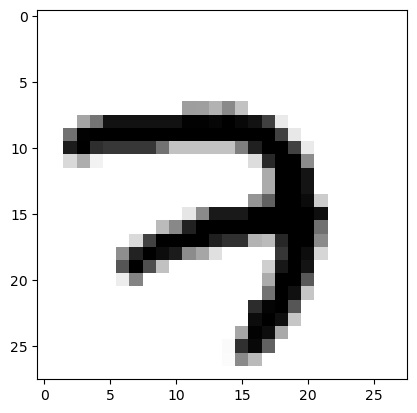

In [65]:
plt.imshow(x_train[0], cmap='binary')
plt.show()

<AxesSubplot: >

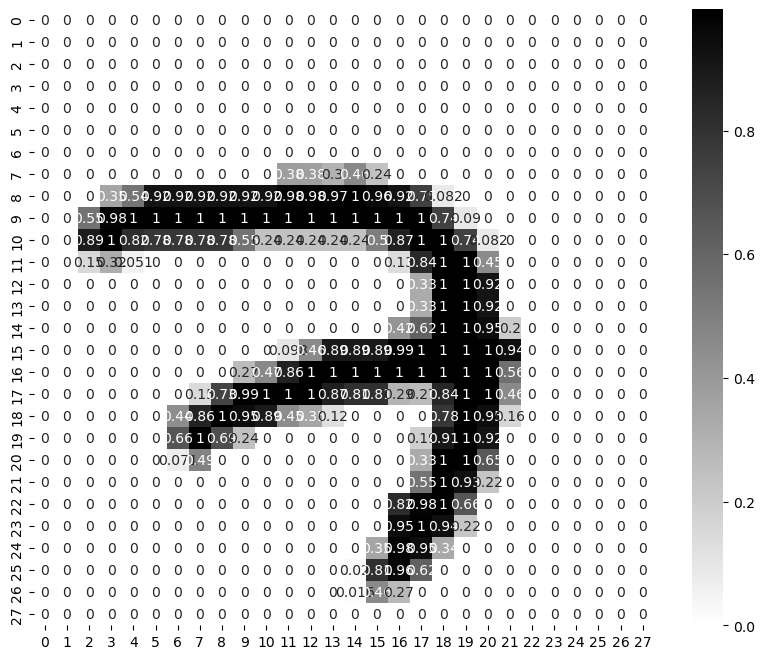

In [66]:
plt.figure(figsize=(10,8))
sns.heatmap(x_train[0], annot=True, cmap='binary')

Model Building - Constructing multiple hidden layers of neurons inside the percentron

We would first flatten the image of size 28*28 to make it into a 1D array and then pass the array through two hiden layers along with an activation fucntion at each layer and finally pass through the output layer along with an activation function that would do the final prediction. The first layer would have 300 neurons, the second layer would have 100 neurons, and the last layer will be the output layer. Since this is a classification problem, the number of neurons for the output layer will be equal to the number of classes in our target variable which is 10. 

In [67]:
LAYERS = [tf.keras.layers.Flatten(input_shape=(28,28), name= 'InputLayer'),
          tf.keras.layers.Dense(300, activation= 'relu', name = 'Layer1'),
          tf.keras.layers.Dense(100, activation= 'relu', name = 'Layer2'),
          tf.keras.layers.Dense(10, activation= 'softmax', name = 'OutputLayer')]

model = tf.keras.models.Sequential(LAYERS)

In [68]:
model.layers

In [69]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (Flatten)        (None, 784)               0         
                                                                 
 Layer1 (Dense)              (None, 300)               235500    
                                                                 
 Layer2 (Dense)              (None, 100)               30100     
                                                                 
 OutputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [70]:
layer1 = model.layers[1]

In [71]:
layer1.name

'Layer1'

In [72]:
layer1.get_weights()[0].shape

(784, 300)

The total number of weights in Layer1 is 784*300 which is 235200.

In [73]:
layer1.get_weights()[1].shape

(300,)

The total number of biases in Layer1 is 300. So 235200 weights and 300 biases makes the total number of trainable parameters in layer1 235500. 

Similarly we can check it for Layer2 and OutputLayer.

CallBack Functions

In [74]:
early_stopping_callback = tf.keras.callbacks.EarlyStopping(patience = 5, min_delta =0.01, restore_best_weights=True)

In [75]:
checkpoint_path = 'Model_checkpoint.h5'
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_best_only = True)

Model Training with forward and backward propagation

In [76]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics='accuracy')

In [77]:
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid), batch_size=32, callbacks=[early_stopping_callback, checkpoint_callback])

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6035 - accuracy: 0.8432 - val_loss: 0.3025 - val_accuracy: 0.9186
Epoch 2/30
  54/1719 [..............................] - ETA: 4s - loss: 0.3194 - accuracy: 0.9080

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1719/1719 [==============================] - 5s 3ms/step - loss: 0.2851 - accuracy: 0.9190 - val_loss: 0.2350 - val_accuracy: 0.9326
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2324 - accuracy: 0.9343 - val_loss: 0.1973 - val_accuracy: 0.9450
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1985 - accuracy: 0.9440 - val_loss: 0.1775 - val_accuracy: 0.9506
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1733 - accuracy: 0.9512 - val_loss: 0.1557 - val_accuracy: 0.9572
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1533 - accuracy: 0.9560 - val_loss: 0.1412 - val_accuracy: 0.9636
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1377 - accuracy: 0.9612 - val_loss: 0.1307 - val_accuracy: 0.9654
Epoch 8/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1248 - accuracy: 0.9653 - val_loss: 0.1236 - val_accuracy: 0.9684
Epo

So we have saved our best model which was at the 22nd epoch which has an validation_accuracy of 97.86% because after that the model could not show any improvement. This has been achieved because of the callback functions. Now we would trian our nural network using this best model. 

In [78]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.603482,0.843236,0.302502,0.9186
1,0.285137,0.918964,0.235044,0.9326
2,0.232431,0.934345,0.197326,0.9450
3,0.198485,0.943982,0.177477,0.9506
4,0.173286,0.951182,0.155740,0.9572
5,0.153340,0.955982,0.141225,0.9636
6,0.137711,0.961182,0.130677,0.9654
7,0.124795,0.965291,0.123598,0.9684
8,0.113576,0.968364,0.120247,0.9686
9,0.103855,0.971236,0.110646,0.9712


With every epoch(or iteration) the loss is getting reduced and the accuracy is increasing. The graph below depicts the same.

<AxesSubplot: >

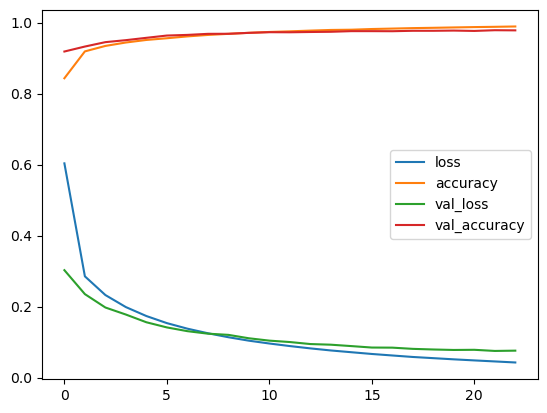

In [79]:
pd.DataFrame(history.history).plot()

Loading Checkpoint model

In [89]:
checkpoint_model = tf.keras.models.load_model(checkpoint_path)

Prediction for the unknown test data - The model would predict the probabilities with which the test data would fall in each class : here each digit from 0 to 9 represents each class of the dataset. 

In [90]:
checkpoint_model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0756 - accuracy: 0.9761


[0.07558999210596085, 0.9761000275611877]

The loss is quite low and the accuracy is quite high for the test data.

Sample Check - Checking for the fist 3 images

In [91]:
x_unknown = x_test[:3]

In [92]:
actual = y_test[:3]

<AxesSubplot: >

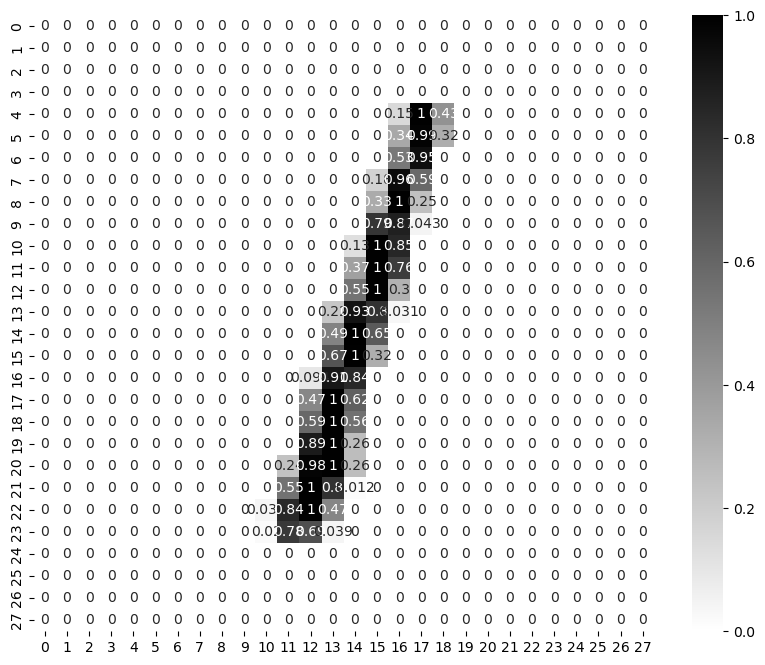

In [93]:
plt.figure(figsize=(10,8))
sns.heatmap(x_test[2], annot=True, cmap='binary')

The third element(image) of the 'x_unknown' dataset is showing the digit as '1'. It is expected that the model would also predict the digit as '1'. 

In [94]:
y_prob = checkpoint_model.predict(x_unknown)
y_prob.round(2) ## Rounding-off the probability to two digits

1/1 [==============================] - 0s 66ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [95]:
y_prob

array([[2.3913369e-06, 3.0943038e-08, 5.7766858e-05, 3.3014614e-04,
        1.7391041e-08, 5.5233551e-07, 8.4056226e-12, 9.9960417e-01,
        2.4655149e-06, 2.4262977e-06],
       [4.1528333e-06, 3.3358534e-05, 9.9981123e-01, 1.4111488e-04,
        1.3291789e-11, 2.9336659e-06, 4.5291840e-06, 1.1229867e-11,
        2.7656711e-06, 5.0894494e-13],
       [1.3733262e-05, 9.9413055e-01, 6.4764457e-04, 1.1442862e-04,
        4.0232000e-04, 2.0190408e-04, 9.3461014e-05, 1.1153079e-03,
        3.2621054e-03, 1.8443694e-05]], dtype=float32)

y_prob shows the probabilities with which each element(image) of the 'x_unknown' dataset would fall in each class : here each digit from 0 to 9 represents each class of the dataset. 

In [96]:
y_predict = np.argmax(y_prob, axis=-1)

In [97]:
y_predict

array([7, 2, 1])

With the help of 'argmax' we get the argument(digit) which has the maximum probability for each item of the 'x_unknown' daatset. Now we can see that our predictions i.e. 'y_predict' and actual are exactly the same. So our model has acurately predicted the unknown data. 